# Pipelining: chaining a PCA and a logistic regression

In [1]:
# Render our plots inline
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
# define estimators that will be used
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()

In [3]:
# build pipeline
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [4]:
pipe.steps[1]

('logistic',
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [5]:
# loads digits data
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

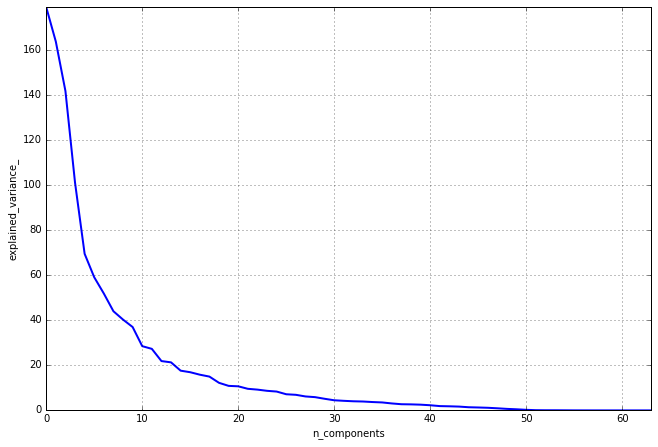

In [6]:
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(12, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [7]:
# Parameter space to be explored
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

In [8]:
# Perform grid search
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))

In [9]:
estimator.fit(X_digits, y_digits)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logistic__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04]), 'pca__n_components': [20, 40, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

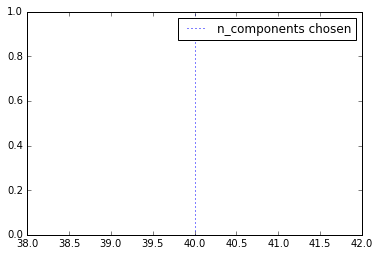

In [10]:
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))

In [11]:
# show optimal estimator
print(estimator.best_estimator_)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
